# Caso Práctico de Módulo 1: Optimización de campañas de markeing online



* Supongamos el caso en el que tenemos que hacer una campaña de marketing online para promocionar un determinado producto. Para ello se mostrará en una página web un banner con una imagen del producto a promocionar. El equipo de diseño ha realizado 5 imágenes distintas del producto para poner en el banner con el objetivo de captar la atención del usuario para que pulse en el banner y acceda a la web con los detalles del producto a promocionar:

<img src="../imgs/img_mo.png" style="width: 700px;"/>

* Dado que no sabemos a priori cual es la imagen del producto que captará mayor atención, debemos de aprender en base a los clicks que se realizan sobre el banner que imagen será las más llamativa y conseguirá más visitas. Para ello aplicaremos el método del Bandido Multi-Brazo con el fin maximizar las visitas a la web del producto a promocionar.

$$Q(imagen_i) = \frac{Nº Clicks}{Nº impresiones de la pagina}$$

* El ***objetivo es encontrar la imagen que capte mayor atención a los usuarios***; es decir que mayor número de clicks obtenga:

$$Q(imagen^{*}) = max Q(imagen_i)$$


* Dado el método a continuación implementado "multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)" se pide llamar a este método pasandole un ratio de exploración adecuado (epsilon) para que encuentre la imagen que mayor número de clicks tiene.


# Caso Practico Final

**Enunciado**

El presente ejercicio es similar al caso práctico de repaso de optimización de campañas de marketing online ya realizado y lo que se pretende con este es asentar los conceptos relativos al algoritmo del bandido multibrazo, como son las ratios de explotación y exploración para la optimización de una campaña de marketing online.

Al igual que en el caso práctico de repaso, se tiene que hacer una campaña de marketing online para promocionar un determinado producto con la que se mostrará en una página web un banner con una imagen del producto que promocionar. Se han realizado cinco imágenes distintas del producto para poner en el banner con el objetivo de captar la atención del usuario para que pulse en el banner y acceda a la web con los detalles del producto que promocionar, pero, a diferencia del caso práctico de repaso, los resultados obtenidos serán diferentes, siendo otra imagen la que mayor valor de Q tenga calculado a partir de la siguiente fórmula:

$$Q(imagen_i) = \frac{Nº Clicks}{Nº impresiones de la pagina}$$

Sin saber a priori cuál es la imagen que captará mayor atención, se debe aprender con base en los clics que se realizan sobre el banner qué imagen será las más llamativa y conseguirá más visitas aplicando el método del bandido multibrazo.

El objetivo es encontrar la imagen que capte mayor atención de los usuarios, es decir que mayor número de clics obtenga:

Dado el método ya implementado en el notebook “multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)”, se pide, modificando el valor de épsilon, responder a la siguientes preguntas para asentar los conceptos relativos al aprendizaje por refuerzo y, en particular, al algoritmo del bandido multibrazo:

1. ¿Cuáles el valor de épsilon que maximiza la imagen con mayor número de clics?
2. ¿Cuáles la imagen que más clics obtiene y cuántos?
3. Poniendo una ratio de explotación del 100%, ¿Qué resultado se obtiene?

Todas estas preguntas deben de ser contestadas en el propio notebook.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def multi_armed_bandit(num_games=1000, epsilon=0.3, verbose=False):

    bandits = [0.1, 0.6, 0.2, 0.1, 0.3]
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador
    num_selected_bandit = np.zeros(len(bandits)) # denominador
    q_bandits = np.zeros(len(bandits))            # Q(a)

    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))

    for game in range(0,num_games):

        old_q_bandits = q_bandits.copy()

        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto

        # Obtengo el reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0

        # Actualizo reward total
        total_reward += reward

        # Actualizo valor (Q) de la imagen
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]

        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit,
                          reward=reward, q_bandits=q_bandits))

    return bandits, total_reward, q_bandits, num_selected_bandit


In [ ]:

def find_optimal_epsilon(num_games=1000, num_iterations=30, epsilon_range=(0, 0.3), epsilon_step=0.01):
    best_epsilon = None
    best_reward = float('-inf')

    epsilons = np.arange(epsilon_range[0], epsilon_range[1] + epsilon_step, epsilon_step)

    for epsilon in epsilons:
        print("Probando epsilon: ", epsilon)
        total_reward = 0
        for _ in range(num_iterations):
            _, reward, _, _ = multi_armed_bandit(num_games, epsilon)
            total_reward += reward

        avg_reward = total_reward / num_iterations

        if avg_reward > best_reward:
            best_reward = avg_reward
            best_epsilon = epsilon

    return best_epsilon

In [ ]:
#EPSILON = 0.3 # PREGUNTA 1
# EPSILON = 0   # PREGUNTA 3

def ejecutar(optimal_epsilon):
  bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000,
                                                                           epsilon=optimal_epsilon,
                                                                           verbose=False)
  print("Initial Bandits Distribution\n  {}".format(bandits))
  print("Bandits Distribution games\n  {}".format(num_selected_bandit))
  print("Q(a) Bandits\n  {}".format(q_bandits))
  print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
  plt.title('Epsilon-greedy')
  plt.bar(range(0,len(bandits)), num_selected_bandit)
  plt.xlabel('Bandido')
  plt.ylabel('num veces elegido')
  plt.show()

Epsilon optimo

Probando epsilon:  0.01
Probando epsilon:  0.02
Probando epsilon:  0.03
Probando epsilon:  0.04
Probando epsilon:  0.05
Probando epsilon:  0.060000000000000005
Probando epsilon:  0.06999999999999999
Probando epsilon:  0.08
Probando epsilon:  0.09
Probando epsilon:  0.09999999999999999
Probando epsilon:  0.11
Probando epsilon:  0.12
Probando epsilon:  0.13
Probando epsilon:  0.14
Probando epsilon:  0.15000000000000002
Probando epsilon:  0.16
Probando epsilon:  0.17
Probando epsilon:  0.18000000000000002
Probando epsilon:  0.19
Probando epsilon:  0.2

Epsilon óptimo: 0.05

Se prueba con el mejor epsilon:  0.05
Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [ 14. 815.  19.  14. 138.]
Q(a) Bandits
  [0.2143 0.5988 0.1053 0.2143 0.2899]
CLICKS: 536


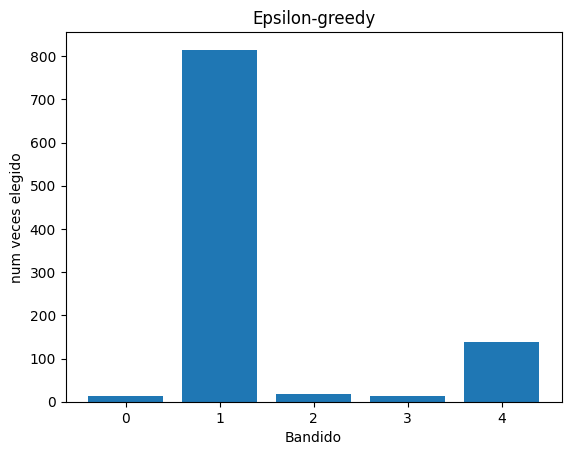

In [ ]:
# Encontrar el valor de epsilon optimo
optimal_epsilon = find_optimal_epsilon(num_games=1000, num_iterations=20, epsilon_range=(0.01, 0.2), epsilon_step=0.01)

print()
print("Epsilon óptimo:", optimal_epsilon)
# Ejecutar el algoritmo con el epsilon óptimo encontrado
print()
print("Se prueba con el mejor epsilon: ", optimal_epsilon)

ejecutar(optimal_epsilon)

### Ratio de Exploración EPSILON:


* Modificando la constante "EPSILON" que es el ratio de exploración se pide:


1. ¿Cuáles el valor de épsilon que maximiza la imagen con mayor número de clics?
    + ***RESPUESTA***: En este caso se realizaron 20 iteraciones con el valor de epsilon de [0.01-0.2] con un incremento de 0.01 a cada valor llegando a obtener un valor de epsilon optimo de **0.05** el cual maximiza la imagen con mayor numero de clics

2. ¿Cuáles la imagen que más clics obtiene y cuántos?
    + ***RESPUESTA***: La imagen que mas clics obtiene es la imagen B (en la gráfica la imagen 1) con un número de Clicks que debe de rondar entorno a 593.






Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [  0. 999.   0.   0.   1.]
Q(a) Bandits
  [0.     0.5936 0.     0.     0.    ]
CLICKS: 593


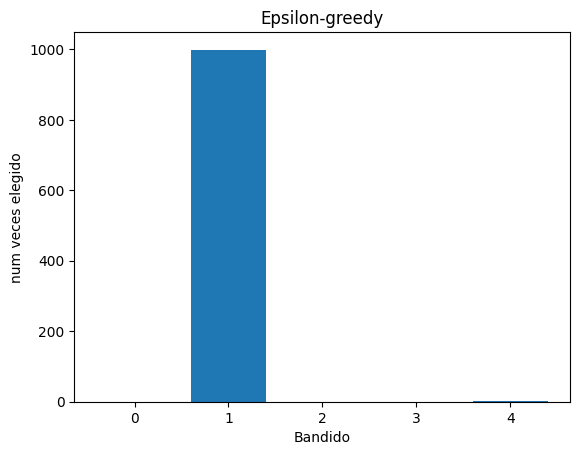

In [ ]:
ejecutar(0)

3. Poniendo una ratio de explotación del 100%, ¿Qué resultado se obtiene?
    + ***RESPUESTA***: Con un ratio de exploracion del 100% (epsilon=0) significa que se elimina la exploracion ya que explotamos el 100% de las veces, lo que puede ser util en situaciones donde se tiene alta confianza en la accion optima desde el inicio, pero generalmente no es recomendable por que limita la capacidad del algoritmo para encontrar la verdadera mejor solucion ya que debido a la falta de exporacion, el algoritmo puede quedar atrapado en una solucion suboptima y nunca descubrir una mejor opcion que podria proporcionar una mayor reconpensa en general, con el epsilon igual a 0 vemos que vamos a seleccionar como imagen a mostrar aquella que primero obtenga el click ya que una vez que esa haya obtenido recompensa siempre mostraremos la misma ya que estaremos explotando la información que tenemos.